<a href="https://colab.research.google.com/github/nkoscinski/nkoscinski/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem, but in our case, we're going to simplify it: predicting a numerical variable based on some other combinations of variables... predicting a number

In [ ]:
# Import TensorFlow
import tensorflow as tf

## Creating data to view and fit

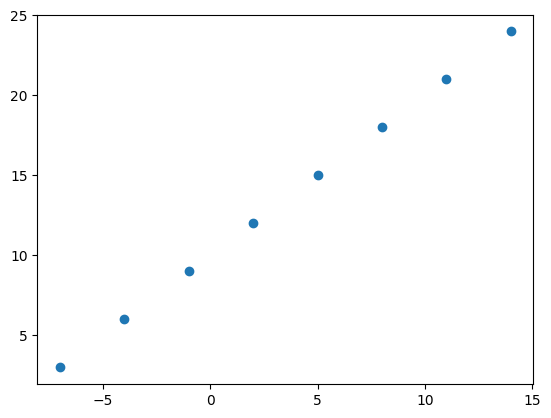

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
X = tf.reshape(X, shape=(8,))
y = tf.reshape(y, shape=(8,))

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

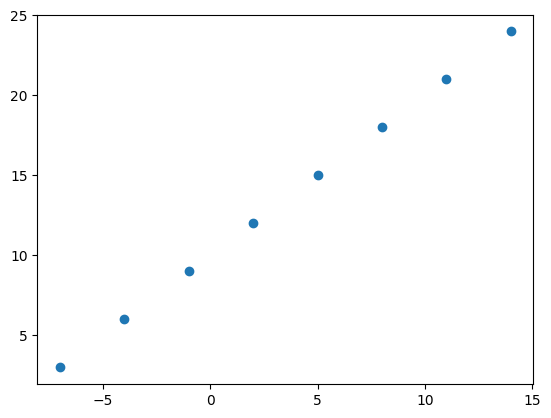

In [ ]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers as well as the hidden layers of a deep learning model
2. **Compile a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(),  # SGD is short for stochastic gradient descent
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 12.0906 - mae: 12.0906
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 11.9581 - mae: 11.9581
Epoch 3/5
1/1 [==============================] - 0s 18ms/step - loss: 11.8256 - mae: 11.8256
Epoch 4/5
1/1 [==============================] - 0s 30ms/step - loss: 11.6931 - mae: 11.6931
Epoch 5/5
1/1 [==============================] - 0s 23ms/step - loss: 11.5606 - mae: 11.5606


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])

1/1 [==============================] - 0s 270ms/step


In [ ]:
y_pred

array([[9.870437]], dtype=float32)

In [ ]:
y_pred + 18

array([[27.870438]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activiation function of each layer
2. **Compiling a model** - here we might change the optimization function or the perhaps the **learning rate** of said optimization function
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from)

In [ ]:
# Let's rebuild our model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 935ms/step - loss: 9.6912 - mae: 9.6912
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 9.5587 - mae: 9.5587
Epoch 3/100
1/1 [==============================] - 0s 37ms/step - loss: 9.4262 - mae: 9.4262
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 9.2937 - mae: 9.2937
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 9.1612 - mae: 9.1612
Epoch 6/100
1/1 [==============================] - 0s 32ms/step - loss: 9.0287 - mae: 9.0287
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 8.8962 - mae: 8.8962
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 8.7637 - mae: 8.7637
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 8.6312 - mae: 8.6312
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 8.4987 - mae: 8.4987
Epoch 11/100
1/1 [==============================] - 0s 19ms/step - l

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
#Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 170ms/step


array([[30.004745]], dtype=float32)

In [ ]:
# Let's rebuild our model again and change something else

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.4690 - mae: 13.4690
Epoch 2/100
1/1 [==============================] - 0s 35ms/step - loss: 13.3864 - mae: 13.3864
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 13.3038 - mae: 13.3038
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 13.2213 - mae: 13.2213
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 13.1388 - mae: 13.1388
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 13.0566 - mae: 13.0566
Epoch 7/100
1/1 [==============================] - 0s 28ms/step - loss: 12.9748 - mae: 12.9748
Epoch 8/100
1/1 [==============================] - 0s 30ms/step - loss: 12.8925 - mae: 12.8925
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 12.8100 - mae: 12.8100
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 12.7275 - mae: 12.7275
Epoch 11/100
1/1 [==============================] -

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 116ms/step


array([[23.581306]], dtype=float32)

In [ ]:
# Let's rebuild our model (and change something else)

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.3372 - mae: 14.3372
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.6251 - mae: 13.6251
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9199 - mae: 12.9199
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 12.2198 - mae: 12.2198
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 11.5217 - mae: 11.5217
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 10.8222 - mae: 10.8222
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 10.1175 - mae: 10.1175
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 9.4044 - mae: 9.4044
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 8.6792 - mae: 8.6792
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 7.9386 - mae: 7.9386
Epoch 11/100
1/1 [==============================] - 0s 21

In [ ]:
model.predict([17.])

1/1 [==============================] - 0s 328ms/step


array([[25.618343]], dtype=float32)

## Evalutaing a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
- The data - what data are we working with? What does it look like?
- The model itself - what does our model look like
- The training of a model - how does a model perform while it learns
- The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the datasets
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

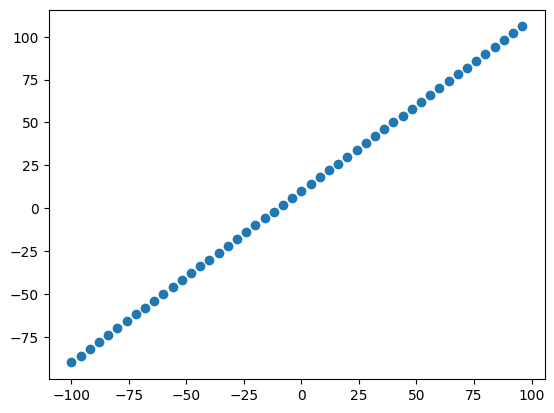

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

- **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available
- **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available
- **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again

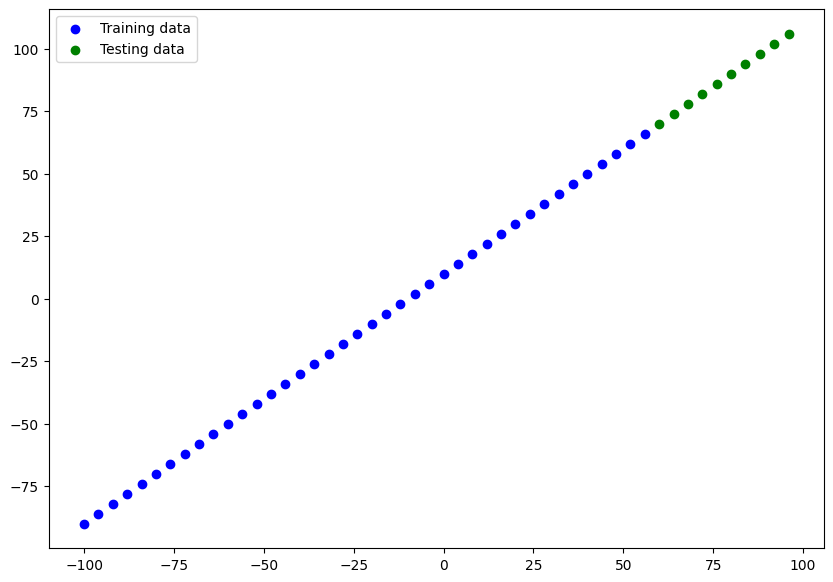

In [ ]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn on this

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data") # want our model to be able to predict this (given X, what's y?)

# Show a legend
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
# Let's create a model which builds automatically by definining the input shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

- Total params - total number of parameters in the model
- Trainable params - these are the parameters (patterns) the model can update as it trains
- Non-trainable params - these parameters aren't updated during training ( these are typical when you bring in already learned patterns or parameters from other models during **transfer learning**)

In [ ]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


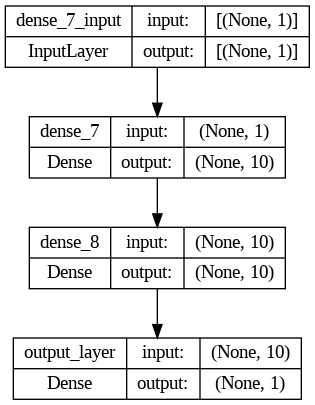

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our models predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels

Often you'll see this in the form of "y_test" or "y_true" vs "y_pred" (ground truth vs your model's predictions)

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 85ms/step


array([[ 72.657326],
       [ 76.96524 ],
       [ 81.273155],
       [ 85.58108 ],
       [ 89.889   ],
       [ 94.196915],
       [ 98.50482 ],
       [102.81275 ],
       [107.12066 ],
       [111.42857 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """

  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

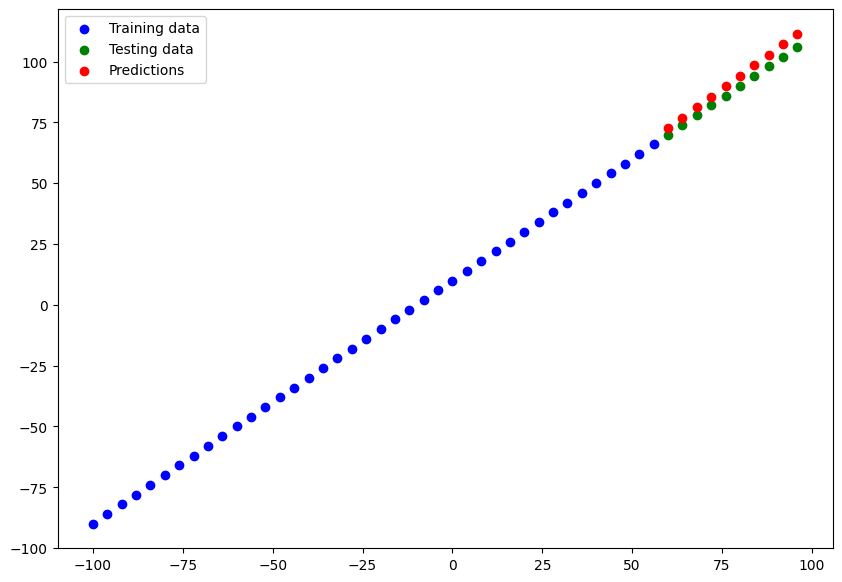

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our models predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance

Since we're working on a regression, two of the main metrics:
- MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
- MSE - mean sqaure error, "you square the average errors"

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 165ms/step - loss: 4.0430 - mae: 4.0430


[4.042952060699463, 4.042952060699463]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))

mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([15.87414 , 13.020856, 11.090738, 10.083784, 10.      , 10.878766,
       12.702893, 15.450201, 19.120659, 23.428574], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 72.657326],
       [ 76.96524 ],
       [ 81.273155],
       [ 85.58108 ],
       [ 89.889   ],
       [ 94.196915],
       [ 98.50482 ],
       [102.81275 ],
       [107.12066 ],
       [111.42857 ]], dtype=float32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 72.657326,  76.96524 ,  81.273155,  85.58108 ,  89.889   ,
        94.196915,  98.50482 , 102.81275 , 107.12066 , 111.42857 ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))

mae

<tf.Tensor: shape=(), dtype=float32, numpy=4.042952>

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))

mse

<tf.Tensor: shape=(), dtype=float32, numpy=17.127666>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                          y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))



### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

1. Get more data - get more examples for your model to train on (more opportunites to learn patterns or relationships between features and labels)
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer
3. Train for longer - give your model more a chance to find patterns in the data

Let's do 3 modeling experiments:
1. `model_1` - same as the original model, 1 layer but train for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs
4.
5.

**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compilt the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics="mae")

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 17ms/step - loss: 91.3377 - mae: 91.3377
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 55.8823 - mae: 55.8823
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 19.4547 - mae: 19.4547
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 9.8755 - mae: 9.8755
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 10.8269 - mae: 10.8269
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 10.0142 - mae: 10.0142
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0621 - mae: 9.0621
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.1104 - mae: 9.1104
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 19.9341 - mae: 19.9341
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 10.7904 - mae: 10.7904
Epoch 11/100
2/2 [==============================] - 0s 9ms/s

1/1 [==============================] - 0s 83ms/step


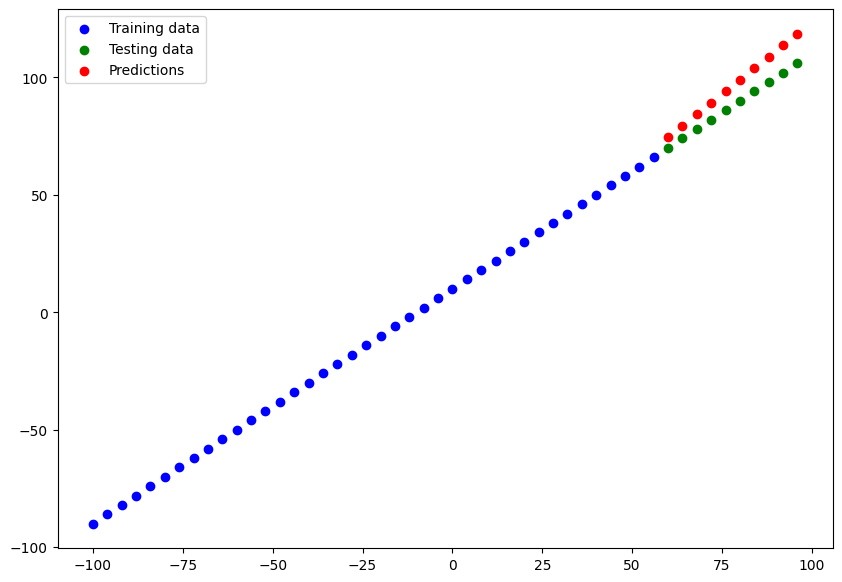

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mse_1 = mse(y_test, y_preds_1)
mse_1

<tf.Tensor: shape=(), dtype=float32, numpy=79.400894>

In [ ]:
mae_1 = mae(y_test, y_preds_1)
mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=8.539748>

**Build `model_2`**

- 2 Dense layers, trained for 100 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 60.9404 - mae: 60.9404
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 20.3771 - mae: 20.3771
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 18.0289 - mae: 18.0289
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 13.2392 - mae: 13.2392
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 14.6072 - mae: 14.6072
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.6468 - mae: 11.6468
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 12.7081 - mae: 12.7081
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 11.0551 - mae: 11.0551
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 39.8709 - mae: 39.8709
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 27.3404 - mae: 27.3404
Epoch 11/100
2/2 [==============================] - 0s 

1/1 [==============================] - 0s 57ms/step


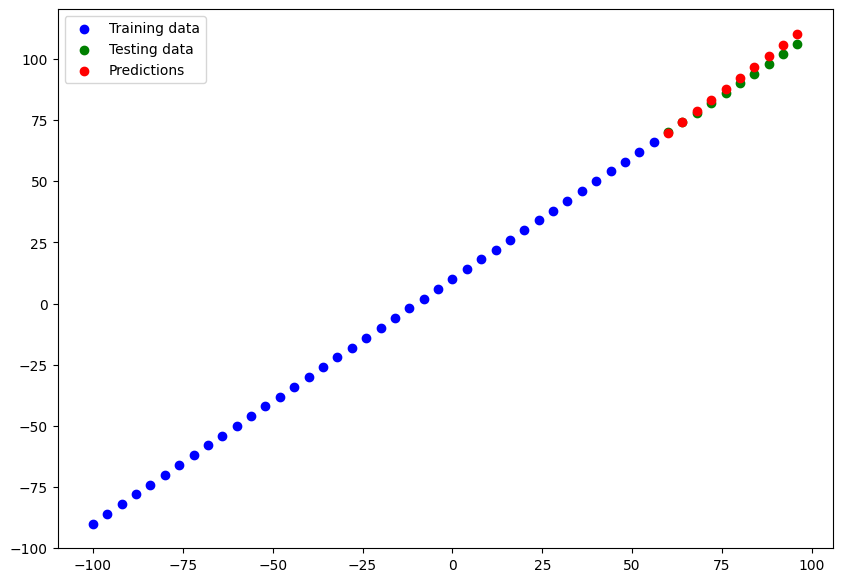

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

In [ ]:
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.97491>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.790709>)

**Build `model_3`**

- 2 layers, trained for 500 epochs

In [ ]:
# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 9ms/step - loss: 24.7233 - mae: 24.7233
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 13.4302 - mae: 13.4302
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 31.0995 - mae: 31.0995
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 13.4880 - mae: 13.4880
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 18.2440 - mae: 18.2440
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 8.5908 - mae: 8.5908
Epoch 7/500
2/2 [==============================] - 0s 11ms/step - loss: 12.4612 - mae: 12.4612
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 11.0153 - mae: 11.0153
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 39.4358 - mae: 39.4358
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 26.9679 - mae: 26.9679
Epoch 11/500
2/2 [==============================] - 0s 8ms/s

1/1 [==============================] - 0s 290ms/step


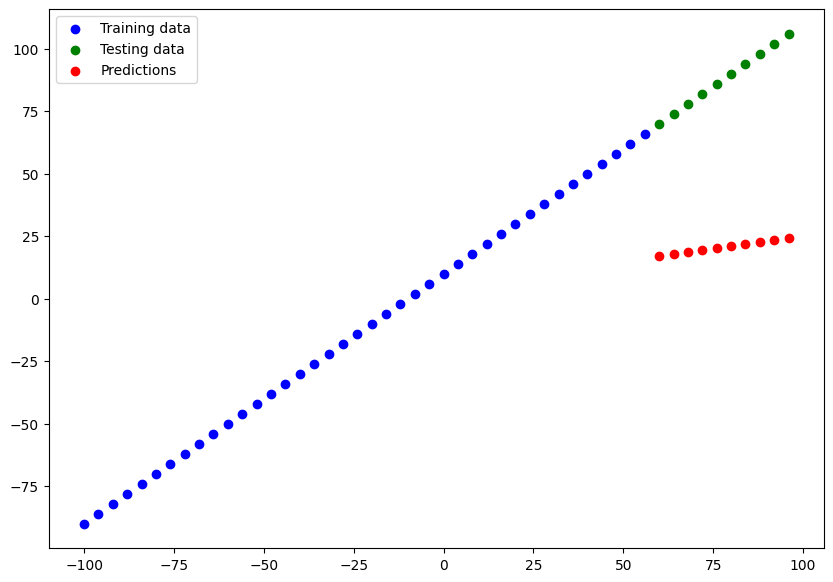

In [ ]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

In [ ]:
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.24784>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4604.986>)

**Note:** You want to start with small experiments (small models) and sure they work and then increase their scale when necessary

### Comparing the results of our experiments

We've run a few experiments, let's compare the results

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.539748,79.400894
1,model_2,1.974910,5.790709
2,model_3,67.247841,4604.985840


Look's like `model_2` performed the best

In [ ]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment"

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments

And when doing so, it can be tedious if you're running lots of experiments

Luckily there are tools to help us

**Resource:** As you build more models, you'll want to look into using:

- TensorBoard - a component of the TensorFlow library to help track modelling experiments
- Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)

### Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as a web application or a mobile app

There are two main formats we can save our models to:

1. the SavedModel format
2. the HDF5 format

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [ ]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a saved model


In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 78ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 249ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file from Google Colab)

If you want to download your file from Google Colab:

1. You can go to the "files" tab and and right click on the file you're after and click "download"

2. Use code (see the cell below)

3. Save it to Google Drive by connecting Google Drive and copying it there (see second code cell below)

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/Colab_Notebooks/Zero_to_Mastery